In [5]:
import os
import sys
import yaml
import pandas as pd
import numpy as np

sys.path.append("../..")
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(project_root)

In [6]:
from mia_utils.utils.cifar_data_preparation import get_cifar_dataloader
from mia_utils.utils.cifar_model_preparation import ResNet18, create_trained_model_and_metadata


# Load the config.yaml file
with open('mia_utils/train_config.yaml', 'r') as file:
    train_config = yaml.safe_load(file)

# Generate the dataset and dataloaders
path = os.path.join(os.getcwd(), train_config["data"]["data_dir"])

train_loader, test_loader = get_cifar_dataloader(path, train_config)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
# # Train the model
# if not os.path.exists("target"):
#     os.makedirs("target")
# if train_config["data"]["dataset"] == "cifar10":
#     num_classes = 10
# elif train_config["data"]["dataset"] == "cifar100":
#     num_classes = 100
# else:
#     raise ValueError("Invalid dataset name")
# print(train_config)

# train_acc_list = []
# train_loss_list = [] 
# test_acc_list = []
# test_loss_list = []

# for _ in range(32):
#     model = ResNet18(num_classes = num_classes)
#     train_acc, train_loss, test_acc, test_loss = create_trained_model_and_metadata(model, 
#                                                                                 train_loader, 
#                                                                                 test_loader, 
#                                                                                 train_config)
#     train_acc_list.append(train_acc[-1])
#     train_loss_list.append(train_loss[-1])
#     test_acc_list.append(test_acc[-1])
#     test_loss_list.append(test_loss[-1])

# print(train_acc_list)
# # print(train_loss_list)
# # print(test_acc_list)
# # print(test_loss_list)
# np.save("./target_acc.npy", train_acc_list)

In [8]:
from mia_utils.cifar_handler import CifarInputHandler

from leakpro import LeakPro

# Read the config file
config_path = "mia_utils/audit.yaml"

# Prepare leakpro object
leakpro = LeakPro(CifarInputHandler, config_path)

# Run the audit 
mia_results = leakpro.run_audit(return_results=True)

2025-02-25 20:54:17,832 INFO     Target model blueprint created from ResNet18 in ./mia_utils/utils/cifar_model_preparation.py.
2025-02-25 20:54:17,834 INFO     Loaded target model metadata from ./target/model_metadata.pkl
2025-02-25 20:54:18,093 INFO     Loaded target model from ./target
2025-02-25 20:54:19,001 INFO     Loaded population dataset from ./data/cifar10.pkl
2025-02-25 20:54:19,003 INFO     Loaded population dataset from ./data/cifar10.pkl
2025-02-25 20:54:19,004 INFO     MIA attack factory loaded.
2025-02-25 20:54:19,005 INFO     Added attack: lira
2025-02-25 20:54:19,006 INFO     Preparing attack: lira
2025-02-25 20:54:19,010 WARNING  Using the same model class for shadow models as the target model.


crossentropyloss


2025-02-25 20:54:19,315 INFO     Training shadow model 0 on 30080 points


CrossEntropyLoss()
CrossEntropyLoss()
optimizer SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


Epoch 10/10: 100%|██████████| 235/235 [00:06<00:00, 38.13it/s]
2025-02-25 20:55:17,337 INFO     Training shadow model 0 complete
2025-02-25 20:55:17,400 INFO     Saved shadow model 0 to ./leakpro_output/attack_objects/shadow_model
2025-02-25 20:55:17,401 INFO     Storing metadata for shadow model 0
2025-02-25 20:55:17,404 INFO     Metadata for shadow model 0 stored in ./leakpro_output/attack_objects/shadow_model
2025-02-25 20:55:17,431 INFO     Loading shadow model 0
2025-02-25 20:55:17,690 INFO     Loaded model from ./leakpro_output/attack_objects/shadow_model/shadow_model_0.pkl
2025-02-25 20:55:17,692 INFO     Loading metadata 0
2025-02-25 20:55:17,699 INFO     Create masks for all IN and OUT samples
2025-02-25 20:55:17,700 INFO     Loading metadata 0


ValueError: No points in the audit dataset are used for the shadow models

In [8]:
#### NEW
sm_acc_list = [
    0.9198, 
    0.9148, 
    0.9208, 
    0.9090, 
    0.9175, 
    0.9211, 
    0.9179, 
    0.9232, 
    0.9152, 
    0.9173, 
    0.9214, 
    0.9191, 
    0.9234, 
    0.9226, 
    0.9236, 
    0.9235, 
    0.9157, 
    0.9130, 
    0.9189, 
    0.9157, 
    0.9164, 
    0.9194, 
    0.9103, 
    0.9255, 
    0.9271, 
    0.9245, 
    0.9181, 
    0.9163, 
    0.9194, 
    0.9199, 
    0.9192, 
    0.9276, 
    0.9207, 
    0.9154, 
    0.9186, 
    0.9192, 
    0.9232, 
    0.9207, 
    0.9173, 
    0.9268
]

acc_list = [0.9292, 0.9335666666666667, 0.9263, 0.9302666666666667, 0.9302, 0.9294, 0.9287333333333333, 0.9221666666666667, 0.9244, 0.9151333333333334, 0.9243666666666667, 0.9271666666666667, 0.9251666666666667, 0.9288333333333333, 0.923, 0.9346666666666666, 0.9249666666666667, 0.9324, 0.9287333333333333, 0.9176666666666666, 0.9258333333333333, 0.9227666666666666, 0.9296, 0.9312, 0.931, 0.9193666666666667, 0.9204333333333333, 0.9212333333333333, 0.9237666666666666, 0.9220333333333334, 0.9247, 0.9273333333333333, 0.9230666666666667, 0.9250333333333334, 0.9236, 0.9225666666666666, 0.9224, 0.9292333333333334, 0.9222333333333333, 0.9318666666666666]

In [ ]:
A = {"a": "sadas", "b": "jfgkfdshg", "c": "jfgkfdshg"}
print(A)

# B = A.pop("b")
B = {k:v for k,v in A.items() if k not in ("a")}

print(B)
print(A)

In [ ]:
len(acc_list)

In [ ]:
# acc_list = [l[-1] for l in train_acc_list]
# acc_list = train_acc_list
# test_acc_list = [l[-1] for l in test_acc_list]

print(np.mean(acc_list), np.std(acc_list))
print(np.mean(sm_acc_list), np.std(sm_acc_list))

print(np.mean(test_acc_list), np.std(test_acc_list))



In [ ]:
import matplotlib.pyplot as plt

bins = np.linspace(0.90, 0.95, 20)

plt.hist(acc_list, bins, alpha=0.5)
plt.hist(sm_acc_list, bins, alpha=0.5)
plt.show()

In [ ]:
import scipy 
scipy.stats.ttest_ind(acc_list, sm_acc_list, equal_var=False)

0.9184197916666667 0.004024032487020604
0.8967311 0.00444195


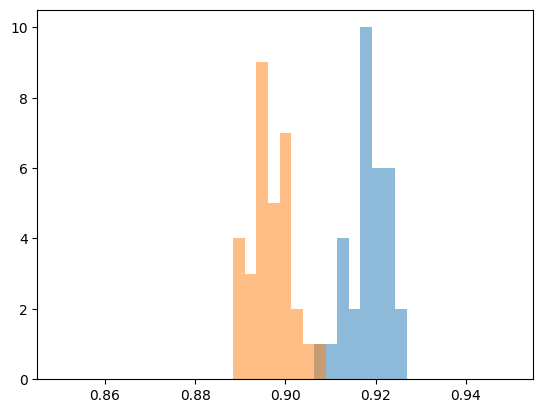

TtestResult(statistic=20.147620027262175, pvalue=9.41774723576566e-29, df=61.40437661029256)


In [7]:
import numpy as np 

sm = np.load("./sm_train_acc.npy")
# print(sm)

acc = np.load("./target_acc.npy")
# print(acc)

print(np.mean(acc), np.std(acc))
print(np.mean(sm), np.std(sm))

import matplotlib.pyplot as plt

bins = np.linspace(0.85, 0.95, 40)

plt.hist(acc, bins, alpha=0.5)
plt.hist(sm, bins, alpha=0.5)
plt.show()

import scipy 
print(scipy.stats.ttest_ind(acc, sm, equal_var=False))

## Before correct shadow model inheritance

In [ ]:
sm_acc_list = [0.8813 ,0.8695,0.8709,0.8715,0.8648,0.8661,0.8850,0.8630,
               0.8681,0.8761,0.8846,0.8446,0.8226,0.8779,0.8827,0.8676,0.8796,
               0.8799,0.8737,0.8456,0.8654,0.8844,0.8798,0.8618,0.8663,
               0.8498,0.8711,0.8931,0.8490,0.8609,0.8668,0.8740]
sm_loss_list = [0.34125723314095036,0.3692375723351827,0.3634859912573022,0.3602159349842275,0.37791972819795,0.3810889556369882,
                0.33041224815744014,0.39009814530293996,0.37390256435313085,0.35251052233766994,
                0.3296242213946711,0.4380828003299996,0.5083211598244117,0.3475922238319481,
                0.33307770259202785,0.3744919901198529,0.34216405134251787,0.3462118466166742,
                0.35326346571141076,0.44457647331217487,0.38304084028969426,0.3306438162605813,
                0.34603032919954735,0.3883417835578007,0.37594985085281923,0.4288098800689616,
                0.36661235826446653,0.30145846415073313,0.42062046343975873,0.39008328125197833,
                0.37429897981755283,0.3558761631554745]

![title](pre_inheritance_output.png)

TtestResult(statistic=17.575372513532436, pvalue=6.491870506989873e-19, df=34.90285127311654)  
using  "scipy.stats.ttest_ind(acc_list, sm_acc_list, equal_var=False)"